<a href="https://colab.research.google.com/github/MURALAAYYAPPA/Deep-Learning/blob/main/multi-layer%20perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6186 - loss: 0.6775 - val_accuracy: 0.7808 - val_loss: 0.5435
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8192 - loss: 0.4803 - val_accuracy: 0.8520 - val_loss: 0.3678
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8748 - loss: 0.3254 - val_accuracy: 0.8520 - val_loss: 0.3368
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8947 - loss: 0.2667 - val_accuracy: 0.8804 - val_loss: 0.2976
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9146 - loss: 0.2284 - val_accuracy: 0.8804 - val_loss: 0.2930
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9230 - loss: 0.2019 - val_accuracy: 0.8870 - val_loss: 0.2879
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9374 - loss: 0.1777 - val_accuracy: 0.8810 - val_loss: 0.2927
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9422 - loss: 0.1653 - val_accuracy: 0.884

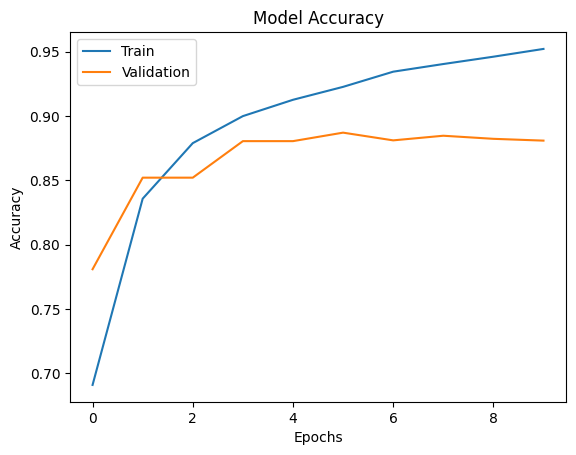

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
#Load the dataset and Perform Padding
num_words=10000
(x_train,y_train), (x_test,y_test)=imdb.load_data(num_words=num_words)
maxlen=200
x_train=pad_sequences(x_train, maxlen=maxlen)
x_test=pad_sequences(x_test, maxlen=maxlen)
#Model the network (bag of words style)
model=keras.Sequential([
layers.Embedding(num_words, 32, input_length=maxlen),
layers.GlobalAveragePooling1D(),
layers.Dense(16,activation='relu'),
layers.Dense(1,activation='sigmoid')
])
#Define the metrics
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
#Train and Evaluate the model
history=model.fit(x_train, y_train, epochs = 10, batch_size=120, validation_split=0.2)
test_loss, test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy:{test_acc:.4f}")
print(f"Test loss:{test_loss:.4f}")
#Plot the graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('Model Accuracy.tiff')
plt.show()